In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [4]:
# Import loan data file
data = pd.read_excel('/Users/kthan/Desktop//Capstone-Project/loan_data_cleaned_numeric.xlsx') 

In [84]:
# Check to ensure data was properly imported
data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128,360,1,0,0
1,1,1,0,0,1,3000,0.0,66,360,1,2,1


# Logistic Regression 
Goal: To investigate the relationship between the 'Loan_Status' and the characteristics of the loan applicant
* Dependent Variable is the 'Loan_Status'
* Independent Variables are 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History' and 'Property_Area'
* Using a logistic regression model, we will be testing the following hypotheses: 
    * H<sub>a</sub>: there is a relationship between the 'Loan_Status' and the characteristics of the loan applicant
    * H<sub>0</sub>: there is no relationship between the independent and dependent variables

By analyzing these hypotheses using a logistic regression model, we aim to gain insights into the factors that affect loan approval in our dataset.


In [7]:
# Define the y and X variables
y = data[['Loan_Status']]
X = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History', 'Property_Area']]

In [4]:
# MinMaxScaler is used to scale the X variables to ensure an 'apples to apples' comparison
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.333333,0.0,0.0,0.05483,0.044567,0.201354,0.72973,1.0,0.0
1,1.0,1.0,0.000000,0.0,1.0,0.03525,0.000000,0.096447,0.72973,1.0,1.0


In [5]:
# Concatenate the y and scaled X variables into a new variable in order to run the logistic regression model
regression_variables = result = pd.concat([X_scaled, y], axis=1)

In [124]:
# Check to ensure the data was properly concatenated
regression_variables.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,0.333333,0.0,0.0,0.05483,0.044567,0.201354,0.72973,1.0,0.0,0
1,1.0,1.0,0.000000,0.0,1.0,0.03525,0.000000,0.096447,0.72973,1.0,1.0,1


In [6]:
# Run a Logistic Regression using the defined y and X variables stored in regression_variables 
logit = smf.logit('Loan_Status ~ Gender + Married + Dependents + Education + Self_Employed + ApplicantIncome + CoapplicantIncome + LoanAmount + Loan_Amount_Term + Credit_History + Property_Area', data=regression_variables)
model = logit.fit()
print_model = model.summary()
print(print_model)

Optimization terminated successfully.
         Current function value: 0.469157
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  480
Model:                          Logit   Df Residuals:                      468
Method:                           MLE   Df Model:                           11
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                  0.2406
Time:                        11:54:29   Log-Likelihood:                -225.20
converged:                       True   LL-Null:                       -296.53
Covariance Type:            nonrobust   LLR p-value:                 4.683e-25
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.1363      0.825     -2.588      0.010      -3.754      -0.518
Gender  

Inital Interpretation of the results. 
- **P>|z|**: 'Married' and 'Credit_History have p-values that are less than 0.05 which suggests that these independent variables are statistically significant in predicting the dependent variable.
- We will employ backward elimination to iteratively eliminate variables with the highest p-values, such as ApplicantIncome, until we achieve a model where all remaining variables exhibit statistically significant p-values.
    - Note: In order to keep the notebook clean, the final model presented below will include only those variables with p-values less than 0.05.

In [7]:
# Run final Logistic Regression using the defined y and X variables stored in regression_variables 
logit = smf.logit('Loan_Status ~ Married + Credit_History', data=regression_variables)
model = logit.fit()
print_model = model.summary()
print(print_model)

Optimization terminated successfully.
         Current function value: 0.476951
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  480
Model:                          Logit   Df Residuals:                      477
Method:                           MLE   Df Model:                            2
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                  0.2279
Time:                        11:54:33   Log-Likelihood:                -228.94
converged:                       True   LL-Null:                       -296.53
Covariance Type:            nonrobust   LLR p-value:                 4.431e-30
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.5953      0.435     -5.962      0.000      -3.449      -1.742
Married          

Final Interpretation of the results. 
- **P>|z|**: 'Married' and 'Credit_History continue to remain the only variables with p-values that are less than 0.05.
- **coef**: The positive coefficients indicate that both being married and having a positive credit history are linked to higher log-odds of loan approval. Specifically, the coefficient for "Credit_History" (3.5709) is notably large, signifying a substantial impact. 
- Both "Married" and "Credit_History" are statistically significant predictors of loan approval, with "Credit_History" having a notably strong positive effect.

# Random Forest Classifier
Goal: To identify the features that are most influential to predicting loan status
* Dependent Variable is the 'Loan_Status'
* Independent Variables are 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History' and 'Property_Area'


Random Forest Classifier Accuracy: 0.8125


Text(0.5, 1.0, 'Confusion Matrix')

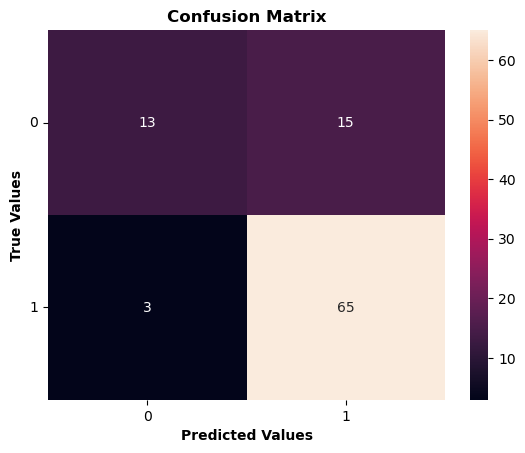

In [8]:
# Create a Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Split the data into training and testing sets (80% train, 20% test). Used the same X and y variables defined above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier on your training data
random_forest_classifier.fit(X_train, y_train)

# Use the random_forest_classifier to make predictions on the test data (checks for accuracy)
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the Model's Performance through its accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy}")

# Evaluate the Model's Performance using a confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel("Predicted Values", weight='bold')
plt.yticks(rotation=360)
plt.ylabel("True Values", weight='bold')
plt.title("Confusion Matrix", weight='bold')

Interpretation of the Random Forest Classifier's Performance
-  The model has accuracy is 81.25% which indicates that it is good at correctly identifying loan approvals
- From the Confusion Matrix's output we see the breakdown of the model's performance: 
    - The model correctly predicted 65 cases of loan approval.
    - The model correctly predicted 13 cases of loan rejection.
    - The model incorrectly predicted 15 cases as loan approvals when they were not.
    - The model incorrectly predicted 3 cases as loan rejections when they were not.

Below, we will examine the feature importance of each variable to identify the variables that have the most influence on determining loan approval status.

In [9]:
# Create variables for feature importances and names
feature_importance = random_forest_classifier.feature_importances_
feature_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History', 'Property_Area']  # Replace with your actual feature names

# Sort the variables by feature importance (descending order)
sorted_features = np.argsort(feature_importance)[::-1]

# Print feature importances with feature names
print("Feature Importances:")
for feature_name in sorted_features:
   print(f"{feature_names[feature_name]}: {feature_importance[feature_name]}")

Feature Importances:
Credit_History: 0.2430089231702193
ApplicantIncome: 0.20148284863777283
LoanAmount: 0.19434613884361926
CoapplicantIncome: 0.11569392866359039
Loan_Amount_Term: 0.05807821761772169
Dependents: 0.05235816802544098
Property_Area: 0.04655095216861904
Married: 0.026792118818291025
Education: 0.023485688942822266
Gender: 0.019493034841025738
Self_Employed: 0.018709980270877512


In [5]:
# Create a function that returns a color gradient to use in the Random Forest Classifier charts below
def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1

    # Convert hex colors to RGB tuples
    c1_rgb = tuple(int(c1[i:i+2], 16) for i in (1, 3, 5))
    c2_rgb = tuple(int(c2[i:i+2], 16) for i in (1, 3, 5))

    # Calculate intermediate RGB values
    rgb_colors = [
        (
            int(c1_rgb[0] + (c2_rgb[0] - c1_rgb[0]) * i / (n - 1)),
            int(c1_rgb[1] + (c2_rgb[1] - c1_rgb[1]) * i / (n - 1)),
            int(c1_rgb[2] + (c2_rgb[2] - c1_rgb[2]) * i / (n - 1))
        )
        for i in range(n)
    ]

    # Convert RGB values back to hex colors
    hex_colors = ["#{:02X}{:02X}{:02X}".format(r, g, b) for r, g, b in rgb_colors]

    return hex_colors

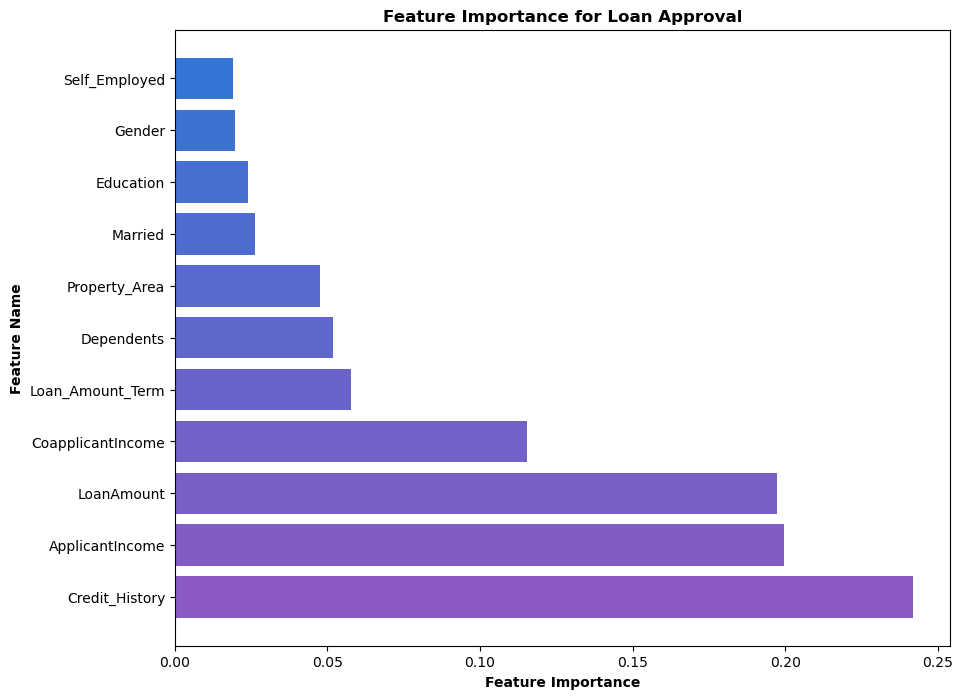

In [14]:
# Plot the feature importances on a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.title("Feature Importance for Loan Approval", weight='bold')
plt.barh(range(len(feature_names)), feature_importance[sorted_features], align="center", color = get_color_gradient("#8A5AC2", "#3575D5", len(feature_names)))
plt.xlabel("Feature Importance", weight='bold')
plt.ylabel("Feature Name", weight='bold')
plt.xticks(rotation=0) 
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_features])
plt.show()

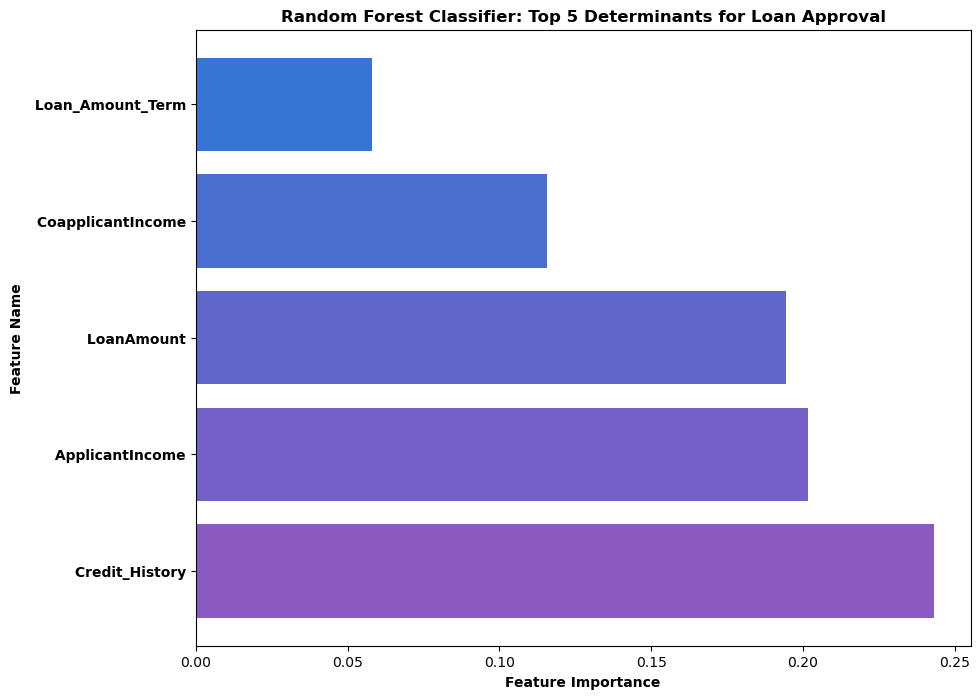

In [10]:
# Plot the top 5 features by feature importance on a horizontal bar chart

top_n = 5  # Number of top features to display
plt.figure(figsize=(10, 8))
plt.title("Random Forest Classifier: Top 5 Determinants for Loan Approval", weight='bold')
plt.barh(range(top_n), feature_importance[sorted_features][:top_n], align="center", color=get_color_gradient("#8A5AC2", "#3575D5", top_n))
plt.xlabel("Feature Importance", weight='bold')
plt.ylabel("Feature Name", weight='bold')
plt.xticks(rotation=0)
#plt.yticks(range(top_n), [feature_names[i] for i in sorted_features][:top_n])
plt.yticks(range(top_n), [f" {feature_names[i]}" for i in sorted_features][:top_n], weight='bold')
plt.show()

Interpretation of the Feature Importance Results
- The top 5 features align logically, as Credit_History, ApplicantIncome, LoanAmount, CoapplicantIncome, and Loan_Amount_Term are all intuitive predictors of loan eligibility. What's particularly noteworthy is that these features are within the direct control of applicants during the application process. Consequently, applicants have the opportunity to enhance their chances of loan approval by actively working on improving these specific aspects.
-  "Credit_History" has the highest influence on the model's predictions, suggesting that an applicant's credit history significantly impacts the likelihood of loan approval.
- Interestingly, when the results are compared to the logistic regression analysis, 'Married' is second to "Credit_history" as a good predictor of Loan_Status. Further exploration would be required to investigate the relationship between marital status and the top 5 features identified by the Random Forest Classifier.

Considering the insights from both models, these findings will guide further exploration into the data. Our next steps will involve a more in-depth examination of the data, with a keen focus on the variables that the models have identified as significant contributors to loan approval status.

**Recreate the Random Forest Classifier** <br>
Exclude variables that should not influence the determination of Loan Status, and assess whether this modification affects the feature importance ranking (e.g., Gender, Education, Self-Employed, etc.).

In [4]:
# Define the y and new X variables
y = data[['Loan_Status']]
X_new_RFC = data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History', 'Property_Area']]

In [5]:
# Create a Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Split the data into training and testing sets (80% train, 20% test). Used the X and y variables defined above
X_train, X_test, y_train, y_test = train_test_split(X_new_RFC, y, test_size=0.2, random_state=42)

# Train the classifier on your training data
random_forest_classifier.fit(X_train, y_train)

# Use the random_forest_classifier to make predictions on the test data (checks for accuracy)
y_pred = random_forest_classifier.predict(X_test)

In [6]:
# Create variables for feature importances and names
feature_importance = random_forest_classifier.feature_importances_
feature_names = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History', 'Property_Area']  # Replace with your actual feature names

# Sort the variables by feature importance (descending order)
sorted_features = np.argsort(feature_importance)[::-1]

# Print feature importances with feature names
print("Feature Importances:")
for feature_name in sorted_features:
   print(f"{feature_names[feature_name]}: {feature_importance[feature_name]}")

Feature Importances:
ApplicantIncome: 0.26332086666618365
Credit_History: 0.24853467451188088
LoanAmount: 0.2319533014880497
CoapplicantIncome: 0.14083894708288205
Loan_Amount_Term: 0.07151694403696288
Property_Area: 0.04383526621404086


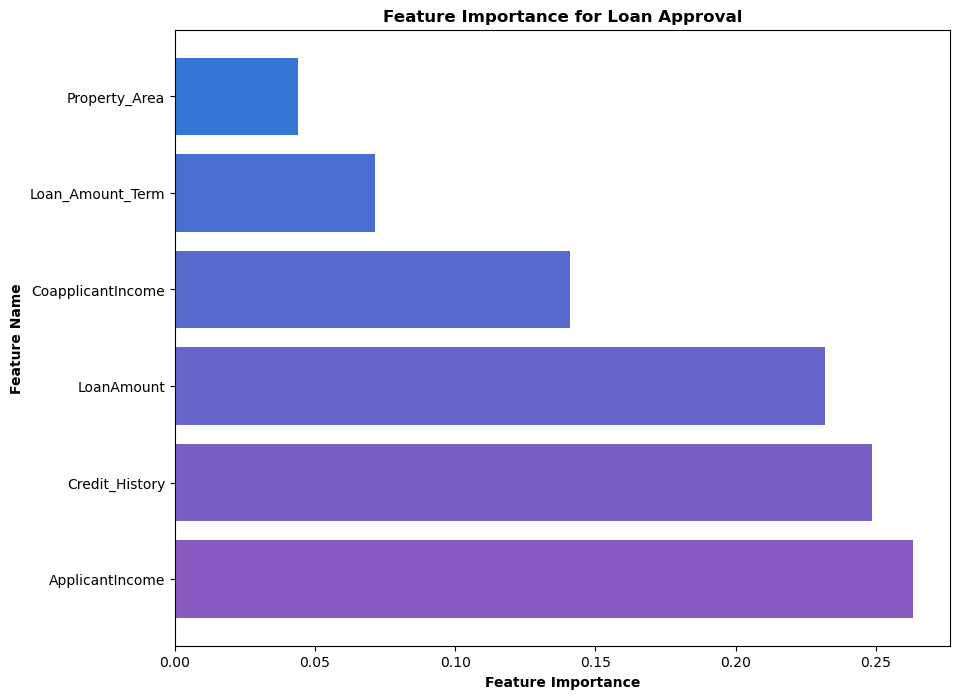

In [9]:
# Plot the new Create a Random Forest Classifier
plt.figure(figsize=(10, 8))
plt.title("Feature Importance for Loan Approval", weight='bold')
plt.barh(range(len(feature_names)), feature_importance[sorted_features], align="center", color = get_color_gradient("#8A5AC2", "#3575D5", len(feature_names)))
plt.xlabel("Feature Importance", weight='bold')
plt.ylabel("Feature Name", weight='bold')
plt.xticks(rotation=0) 
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_features])
plt.show()

Interpretation of the New Feature Importance Results
* When the variables that should not affect loan status were removed the feature importance ranking remained largely unchanged. In fact, the relative positions of all the remaining features were consistent, and the primary difference was that each of these remaining variables experienced a slight increase in their feature importance scores.
* Therefore, removing irrelevant variables didn't change the overall importance ranking of the features but slightly increased the perceived importance of the remaining features, making the model more robust and focused on the relevant variables.